In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


IMPORT ALL THE LIBRARIES


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pit
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import re
import string

In [ ]:
df_fake=pd.read_csv("/content/drive/MyDrive/fake.csv")
df_true=pd.read_csv("/content/drive/MyDrive/true.csv")

In [ ]:
df_true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  class  
0  December 31, 2017       1  
1  December 29, 2017       1  
2  December 31, 2017       1  
3  December 30, 2017       1  
4  December 29, 2017       1

In [ ]:
df_fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [ ]:
df_fake["class"]=0
df_true["class"]=1

In [ ]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [ ]:
df_fake=df_fake.iloc[:-2064]

In [ ]:
df_fake.shape, df_true.shape

((21417, 5), (21417, 5))

In [ ]:
df_fake_manual_testing= df_fake.tail(10)
for i in  df_fake_manual_testing.index:
    df_fake.drop([i], axis=0, inplace=True)


df_true_manual_testing= df_true.tail(10)
for i in df_true_manual_testing.index:
    df_true.drop([i], axis=0, inplace=True)

<ipython-input-12-de2088556c08>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake.drop([i], axis=0, inplace=True)
<ipython-input-12-de2088556c08>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake.drop([i], axis=0, inplace=True)
<ipython-input-12-de2088556c08>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake.drop([i], axis=0, inplace=True)
<ipython-input-12-de2088556c08>:3: SettingWithCopyWarning: 
A value is tryin

In [ ]:
df_fake.shape, df_true.shape

((21407, 5), (21407, 5))

In [ ]:
df_fake_manual_testing.loc[:, "class"] = 0
df_true_manual_testing.loc[:, "class"] = 1

In [ ]:
df_fake_manual_testing.head(10)

title  \
21407  WE WILL NOT COMPLY! VA Residents Refuse To Obe...   
21408  SAY WHAT? Tide Detergent Joins Forces With Ope...   
21409  SHOCKING VIDEO: New Rape Clinic For Men Opens ...   
21410  THE TALLY IS IN: Total Number Of Lies Told By ...   
21411  DISNEY Introduces New Marvel Comic Books: Capt...   
21412  SHOCKING TAXPAYER TAB FOR OBAMA’S GOLF Trips A...   
21413  WOW! WORLD’S TOP PHYSICIST AND DEMOCRAT: Obama...   
21414  URGENT! Join #AntiHillaryFlashMob Rally Agains...   
21415  IS LAW AND ORDER SVU PANDERING To Cop Hating M...   
21416  GUN CONTROL FOR KIDS: [Video] 13 Yr Old Told T...   

                                                    text    subject  \
21407  The first shot against PC tyranny in Virginia ...  left-news   
21408  I wish there was some way I could let Tide Det...  left-news   
21409  This is an eye-opening story and should be sha...  left-news   
21410  Thanks to Ben Shapiro of Breitbart News, we no...  left-news   
21411  Indoctrination by Disney pretty much covers ev...  left-news   
21412  Meanwhile, most Americans can t afford to take...  left-news   
21413  B b but does this mean global climate change i...  left-news   
21414  Event organizers are asking protesters to come...  left-news   
21415  It s hard for millennials to escape the leftis...  left-news   
21416  Meanwhile, a Muslim boy with a radical activis...  left-news   

               date  class  
21407  Oct 18, 2015      0  
21408  Oct 17, 2015      0  
21409  Oct 17, 2015      0  
21410  Oct 16, 2015      0  
21411  Oct 16, 2015      0  
21412  Oct 16, 2015      0  
21413  Oct 15, 2015      0  
21414  Oct 14, 2015      0  
21415  Oct 14, 2015      0  
21416  Oct 14, 2015      0

In [ ]:
df_true_manual_testing.head(10)

title  \
21407  Mata Pires, owner of embattled Brazil builder ...   
21408  U.S., North Korea clash at U.N. forum over nuc...   
21409  U.S., North Korea clash at U.N. arms forum on ...   
21410  Headless torso could belong to submarine journ...   
21411  North Korea shipments to Syria chemical arms a...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
21407  SAO PAULO (Reuters) - Cesar Mata Pires, the ow...  worldnews   
21408  GENEVA (Reuters) - North Korea and the United ...  worldnews   
21409  GENEVA (Reuters) - North Korea and the United ...  worldnews   
21410  COPENHAGEN (Reuters) - Danish police said on T...  worldnews   
21411  UNITED NATIONS (Reuters) - Two North Korean sh...  worldnews   
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...  worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...  worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...  worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...  worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...  worldnews   

                   date  class  
21407  August 22, 2017       1  
21408  August 22, 2017       1  
21409  August 22, 2017       1  
21410  August 22, 2017       1  
21411  August 21, 2017       1  
21412  August 22, 2017       1  
21413  August 22, 2017       1  
21414  August 22, 2017       1  
21415  August 22, 2017       1  
21416  August 22, 2017       1

In [ ]:
df_merge = pd.concat([df_fake, df_true], axis=0, ignore_index=True)
df_merge.head(10)

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   
5   Racist Alabama Cops Brutalize Black Boy While...   
6   Fresh Off The Golf Course, Trump Lashes Out A...   
7   Trump Said Some INSANELY Racist Stuff Inside ...   
8   Former CIA Director Slams Trump Over UN Bully...   
9   WATCH: Brand-New Pro-Trump Ad Features So Muc...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   
5  The number of cases of cops brutalizing and ki...    News   
6  Donald Trump spent a good portion of his day a...    News   
7  In the wake of yet another court decision that...    News   
8  Many people have raised the alarm regarding th...    News   
9  Just when you might have thought we d get a br...    News   

                date  class  
0  December 31, 2017      0  
1  December 31, 2017      0  
2  December 30, 2017      0  
3  December 29, 2017      0  
4  December 25, 2017      0  
5  December 25, 2017      0  
6  December 23, 2017      0  
7  December 23, 2017      0  
8  December 22, 2017      0  
9  December 21, 2017      0

In [ ]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [ ]:
df = df_merge.drop(["title", "subject", "date"], axis=1)

In [ ]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [ ]:
df= df.sample(frac=1)

In [ ]:

df.head(20)

text  class
12473                                                         0
19355                                                         0
25642  SEOUL (Reuters) - U.S. Vice President Mike Pen...      1
7204   Cruz has recently gone on the attack against D...      0
40572  DUBAI (Reuters) - Iran s Revolutionary Guards ...      1
4397   Trump has been having a very, very bad week. F...      0
20665  As millions of dollars of union dues flow into...      0
11719  This isn t the first time  scientists  have be...      0
12816  Sean Hannity is taking a page from Trump s pla...      0
12441                                                         0
24092  WASHINGTON (Reuters) - U.S. President Donald T...      1
12286                                                         0
28679  WASHINGTON (Reuters) - President Barack Obama ...      1
30180  WASHINGTON (Reuters) - U.S. President Barack O...      1
18987  President Trump s administration has told the ...      0
23563  WASHINGTON (Reuters) - Annual employee surveys...      1
16934  Since Obama was sworn in as President hundreds...      0
4407   The Black Lives Matter movement has become a c...      0
31558  WASHINGTON (Reuters) - President Barack Obama ...      1
10921  On more than one occasion, Condoleezza Rice wa...      0

In [ ]:
df.reset_index(inplace=True)
df.drop(["index"], axis=1, inplace=True)

In [ ]:
df.columns

Index(['text', 'class'], dtype='object')

In [ ]:
df.head()

text  class
0                                                         0
1                                                         0
2  SEOUL (Reuters) - U.S. Vice President Mike Pen...      1
3  Cruz has recently gone on the attack against D...      0
4  DUBAI (Reuters) - Iran s Revolutionary Guards ...      1

In [ ]:
df.tail()

text  class
42809  If there s one person who is loved by all in t...      0
42810  MADRID (Reuters) - The influential Catalan bus...      1
42811  WASHINGTON/NEW YORK (Reuters) - President-elec...      1
42812  Since March of 2010, the American people have ...      0
42813  WASHINGTON, 2016 - A top aide to Donald Trump ...      1

In [ ]:
def wordopt(text):
  text= text.lower()
  text= re.sub('\[.*?\]', '', text)
  text= re.sub("\\W", " ", text)
  text= re.sub('https?://\S+|www\.\S+', '', text)
  text= re.sub('<.*?>+', '', text)
  text= re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text= re.sub('\n', '', text)
  text= re.sub('\w*\d\w*', '', text)
  return text

In [ ]:
df['text']= df['text'].apply(wordopt)

In [ ]:
x= df['text']
y= df['class']

In [ ]:
x_train, x_test, y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

vector= TfidfVectorizer(max_features=2000,stop_words='english')
xv_train= vector.fit_transform(x_train)
xv_test= vector.transform(x_test)

LOGISTICREGRESSION


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xv_train, y_train)
lr_pred=lr.predict(xv_test)
LR_ACC=accuracy_score(y_test,lr_pred)
print(LR_ACC)
print(classification_report(y_test,lr_pred))

0.987737942309938
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4317
           1       0.99      0.99      0.99      4246

    accuracy                           0.99      8563
   macro avg       0.99      0.99      0.99      8563
weighted avg       0.99      0.99      0.99      8563



DECISION TREE


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier().fit(xv_train,y_train)
dt_pred=dt.predict(xv_test)
DT_ACC=accuracy_score(y_test,dt_pred)
print(DT_ACC)
print(classification_report(y_test,dt_pred))

0.995912647436646
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4317
           1       1.00      1.00      1.00      4246

    accuracy                           1.00      8563
   macro avg       1.00      1.00      1.00      8563
weighted avg       1.00      1.00      1.00      8563



SUPPORT VECTOR MACHINE

In [ ]:
from sklearn import svm
clf_linear1 = svm.SVC(kernel='linear')
clf_linear1.fit(xv_train, y_train)
lr_pred_svm = clf_linear1.predict(xv_test)
SVM_ACC=accuracy_score(y_test,lr_pred_svm)
print(SVM_ACC)
print(classification_report(y_test,lr_pred_svm))


0.9922924208805325
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4317
           1       0.99      1.00      0.99      4246

    accuracy                           0.99      8563
   macro avg       0.99      0.99      0.99      8563
weighted avg       0.99      0.99      0.99      8563



GAUSSIAN NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
xv_train_dense = xv_train.toarray()
xv_test_dense = xv_test.toarray()

# Now fit the GaussianNB model
gnb = GaussianNB().fit(xv_train_dense, y_train)

# Make predictions
pred_nb = gnb.predict(xv_test_dense)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
GNB_ACC=accuracy_score(y_test, pred_nb)
print(GNB_ACC)
print(classification_report(y_test, pred_nb))

0.9024874459885555
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      4317
           1       0.91      0.90      0.90      4246

    accuracy                           0.90      8563
   macro avg       0.90      0.90      0.90      8563
weighted avg       0.90      0.90      0.90      8563



MULTINOMIAL NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb=  MultinomialNB().fit(xv_train,y_train)
pred_mnb=mnb.predict(xv_test)
MNB_ACC=accuracy_score(y_test,pred_mnb)
print(MNB_ACC)
print(classification_report(y_test,pred_mnb))

0.9098446806025926
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4317
           1       0.90      0.92      0.91      4246

    accuracy                           0.91      8563
   macro avg       0.91      0.91      0.91      8563
weighted avg       0.91      0.91      0.91      8563



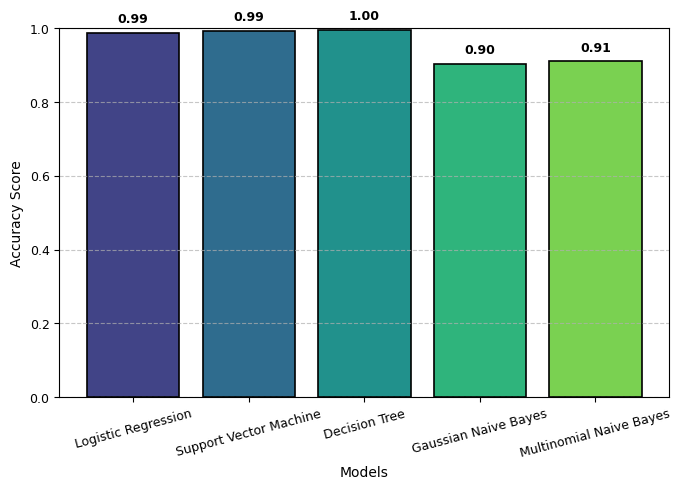

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy scores
models = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'Gaussian Naive Bayes', 'Multinomial Naive Bayes']
accuracy_scores = [LR_ACC, SVM_ACC, DT_ACC, GNB_ACC, MNB_ACC]

# Gradient color customization
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(models)))

# Plot the accuracy scores
plt.figure(figsize=(7, 5))  # Slightly larger figure for better visibility
bars = plt.bar(models, accuracy_scores, color=colors, edgecolor='black', linewidth=1.2)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add titles and labels

plt.xlabel('Models', fontsize=10)
plt.ylabel('Accuracy Score', fontsize=10)
plt.ylim(0, 1)  # Assuming accuracy scores are between 0 and 1
plt.xticks(fontsize=9, rotation=15)  # Slight rotation for better readability
plt.yticks(fontsize=9)

# Display the accuracy values above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f'{yval:.2f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# Save the image
plt.tight_layout()
plt.savefig('accuracy_scores_ml_graph.png', dpi=300, bbox_inches='tight')  # Saves the plot as a PNG image

# Show the plot
plt.show()



BOOSTING ALGORITHMS

GRADIENT BOOSTING


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_booster = GradientBoostingClassifier()
gradient_booster.fit(xv_train,y_train)
y_pred_gradboost=gradient_booster.predict(xv_test)
from sklearn.metrics import classification_report,accuracy_score

GRAD_ACC=accuracy_score(y_test,y_pred_gradboost)
print(GRAD_ACC)
print(classification_report(y_test,y_pred_gradboost))

0.9970804624547471
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4317
           1       1.00      1.00      1.00      4246

    accuracy                           1.00      8563
   macro avg       1.00      1.00      1.00      8563
weighted avg       1.00      1.00      1.00      8563



ADABOOSTING

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(xv_train, y_train)
y_pred_abc = abc.predict(xv_test)
from sklearn.metrics import classification_report,accuracy_score
ADA_ACC=accuracy_score(y_test,y_pred_abc)
print(ADA_ACC)
print(classification_report(y_test,y_pred_abc))

0.9960294289384561
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4317
           1       0.99      1.00      1.00      4246

    accuracy                           1.00      8563
   macro avg       1.00      1.00      1.00      8563
weighted avg       1.00      1.00      1.00      8563



XGBoosting

In [ ]:
from xgboost import XGBClassifier
modelxgb = XGBClassifier(learning_rate=1)
modelxgb.fit(xv_train,y_train)
y_pred_xgb=modelxgb.predict(xv_test)
from sklearn.metrics import classification_report,accuracy_score

XGB_ACC=accuracy_score(y_test,y_pred_xgb)
print(XGB_ACC)
print(classification_report(y_test,y_pred_xgb))

0.9980147144692281
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4317
           1       1.00      1.00      1.00      4246

    accuracy                           1.00      8563
   macro avg       1.00      1.00      1.00      8563
weighted avg       1.00      1.00      1.00      8563



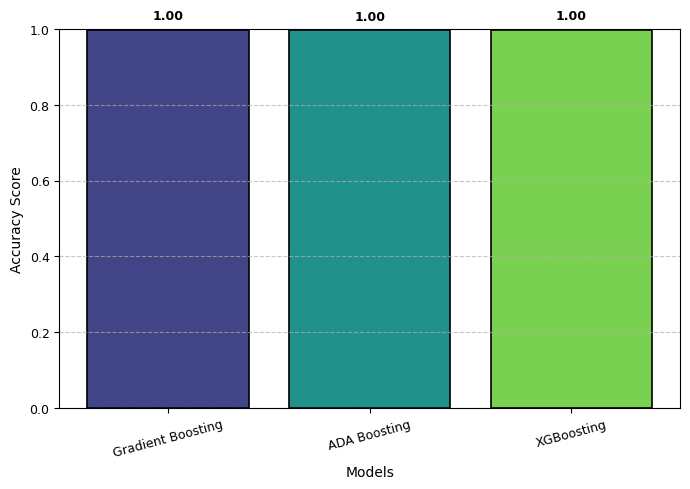

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy scores
models = ['Gradient Boosting', 'ADA Boosting', 'XGBoosting']
accuracy_scores = [GRAD_ACC, ADA_ACC, XGB_ACC]

# Gradient color customization
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(models)))

# Plot the accuracy scores
plt.figure(figsize=(7, 5))  # Slightly larger figure for better visibility
bars = plt.bar(models, accuracy_scores, color=colors, edgecolor='black', linewidth=1.2)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add titles and labels

plt.xlabel('Models', fontsize=10)
plt.ylabel('Accuracy Score', fontsize=10)
plt.ylim(0, 1)  # Assuming accuracy scores are between 0 and 1
plt.xticks(fontsize=9, rotation=15)  # Slight rotation for better readability
plt.yticks(fontsize=9)

# Display the accuracy values above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f'{yval:.2f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# Save the image
plt.tight_layout()
plt.savefig('accuracy_scoreMl2_graph.png', dpi=300, bbox_inches='tight')  # Saves the plot as a PNG image

# Show the plot
plt.show()


ENSEMBLE MODEL

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
X = np.array([pred_mnb ,y_pred_gradboost,lr_pred,lr_pred_svm]).T
meta_learner =LogisticRegression()
meta_learner.fit(X, y_test)
ensemble_predictions = meta_learner.predict(X)
from sklearn.metrics import classification_report,accuracy_score

print(accuracy_score(y_test,ensemble_predictions))
print(classification_report(y_test,ensemble_predictions))

0.9980147144692281
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4317
           1       1.00      1.00      1.00      4246

    accuracy                           1.00      8563
   macro avg       1.00      1.00      1.00      8563
weighted avg       1.00      1.00      1.00      8563



HYPERPARAMETER TUNING

RANDOMIZEDSEARCH CV

LOGISTIC REGRESSION

In [ ]:

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform

In [ ]:
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for Logistic Regression
param_dist_lr = {
    'C': loguniform(1e-3, 1e3),         # Regularization strength
    'solver': ['liblinear', 'saga'],   # Solver algorithms
    'penalty': ['l1', 'l2'],           # Regularization type
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Perform RandomizedSearchCV
random_search_lr = RandomizedSearchCV(log_reg, param_distributions=param_dist_lr, n_iter=50, cv=5, random_state=42, n_jobs=-1)
random_search_lr.fit(xv_train, y_train)

# Best model and results
print("Best parameters for Logistic Regression:", random_search_lr.best_params_)
print("Best score for Logistic Regression:", random_search_lr.best_score_)


Best parameters for Logistic Regression: {'C': 4.418441521199722, 'penalty': 'l1', 'solver': 'liblinear'}
Best score for Logistic Regression: 0.9939564217275543


In [ ]:
# Evaluate the best model
best_model = random_search_lr.best_estimator_  # For lr, use the best model found in RandomizedSearchCV
bestlr_y_pred = best_model.predict(xv_test)
print("Accuracy:", accuracy_score(y_test, bestlr_y_pred))
print("Classification Report:\n", classification_report(y_test,bestlr_y_pred))

Accuracy: 0.994861613920355
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4317
           1       0.99      1.00      0.99      4246

    accuracy                           0.99      8563
   macro avg       0.99      0.99      0.99      8563
weighted avg       0.99      0.99      0.99      8563



NAIVE BAYES

GAUSSIAN NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

# Define the parameter grid for Naive Bayes
param_dist_nb = {
    'var_smoothing': loguniform(1e-9, 1e-2),  # Regularization parameter for numerical stability
}

# Initialize the Naive Bayes model
nb = GaussianNB()

# Perform RandomizedSearchCV
random_search_nb = RandomizedSearchCV(nb, param_distributions=param_dist_nb, n_iter=50, cv=5, random_state=42, n_jobs=-1)
random_search_nb.fit(xv_train_dense, y_train)

# Best model and results
print("Best parameters for Naive Bayes:", random_search_nb.best_params_)
print("Best score for Naive Bayes:", random_search_nb.best_score_)


Best parameters for Naive Bayes: {'var_smoothing': 1.39345022513376e-09}
Best score for Naive Bayes: 0.9016378875906016


In [ ]:
# Evaluate the best model
best_model2 = random_search_nb.best_estimator_  # For gnb, use the best model found in RandomizedSearchCV
bestnb_y_pred = best_model2.predict(xv_test_dense)
print("Accuracy:", accuracy_score(y_test, bestnb_y_pred))
print("Classification Report:\n", classification_report(y_test,bestnb_y_pred))

Accuracy: 0.9024874459885555
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90      4317
           1       0.91      0.90      0.90      4246

    accuracy                           0.90      8563
   macro avg       0.90      0.90      0.90      8563
weighted avg       0.90      0.90      0.90      8563



MULTINOMIAL NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform

# Define the parameter grid for Multinomial Naive Bayes
param_dist_nb = {
    'alpha': loguniform(1e-4, 1e1),  # Regularization parameter (smoothing)
    'fit_prior': [True, False],       # Whether to learn class prior probabilities or not
}

# Initialize the Multinomial Naive Bayes model
mnb = MultinomialNB()

# Perform RandomizedSearchCV
random_search_mnb = RandomizedSearchCV(mnb, param_distributions=param_dist_nb, n_iter=150, cv=5, random_state=42, n_jobs=-1)
random_search_mnb.fit(xv_train, y_train)

# Best model and results
print("Best parameters for Multinomial Naive Bayes:", random_search_mnb.best_params_)
print("Best score for Multinomial Naive Bayes:", random_search_mnb.best_score_)


Best parameters for Multinomial Naive Bayes: {'alpha': 0.00010090061869151566, 'fit_prior': False}
Best score for Multinomial Naive Bayes: 0.926863414899205


In [ ]:
best_model3 = random_search_mnb.best_estimator_
bestmnb_y_pred = best_model3.predict(xv_test)
print("Accuracy:", accuracy_score(y_test, bestmnb_y_pred))
print("Classification Report:\n", classification_report(y_test,bestmnb_y_pred))

Accuracy: 0.9261940908560085
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93      4317
           1       0.93      0.92      0.93      4246

    accuracy                           0.93      8563
   macro avg       0.93      0.93      0.93      8563
weighted avg       0.93      0.93      0.93      8563



HYPERPARAMETER TUNING FOR DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid for Decision Tree
param_dist_dt = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # Splitting criteria
    'splitter': ['best', 'random'],  # Strategy for splitting
    'max_depth': [None] + list(range(2, 50)),  # Maximum depth of the tree
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20),  # Minimum number of samples required to be a leaf node
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider for best split
    'max_leaf_nodes': [None] + list(range(10, 100)),  # Maximum number of leaf nodes
}

# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Perform RandomizedSearchCV
random_search_dt = RandomizedSearchCV(dt, param_distributions=param_dist_dt, n_iter=50, cv=5, random_state=42, n_jobs=-1)
random_search_dt.fit(xv_train, y_train)

# Best model and results
print("Best parameters for Decision Tree:", random_search_dt.best_params_)
print("Best score for Decision Tree:", random_search_dt.best_score_)


Best parameters for Decision Tree: {'criterion': 'log_loss', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': 11, 'min_samples_leaf': 4, 'min_samples_split': 4, 'splitter': 'best'}
Best score for Decision Tree: 0.9942191485712033


In [ ]:
best_model4 = random_search_dt.best_estimator_
bestdt_y_pred = best_model4.predict(xv_test)
print("Accuracy:", accuracy_score(y_test, bestdt_y_pred))
print("Classification Report:\n", classification_report(y_test,bestdt_y_pred))

Accuracy: 0.9969636809529371
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4317
           1       1.00      1.00      1.00      4246

    accuracy                           1.00      8563
   macro avg       1.00      1.00      1.00      8563
weighted avg       1.00      1.00      1.00      8563



LIME

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=5863377246ec686d9fc78c9394a61e40287ded71169129cc596f7ee228286cf5
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


lime for logistic regression

Accuracy: 0.9857526567791661
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4315
           1       0.98      0.99      0.99      4248

    accuracy                           0.99      8563
   macro avg       0.99      0.99      0.99      8563
weighted avg       0.99      0.99      0.99      8563



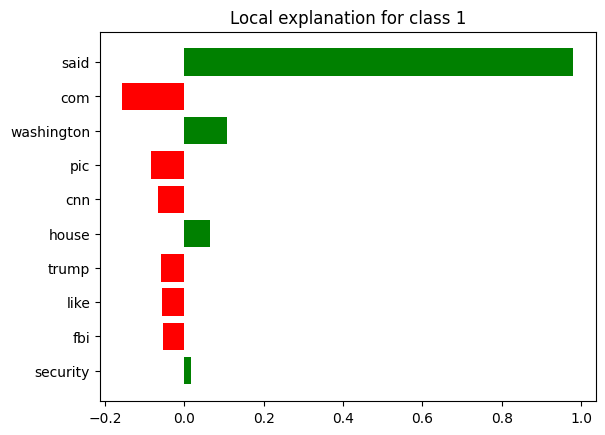

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Initialize the LimeTabularExplainer with the raw numerical data
explainer = LimeTabularExplainer(
    training_data=xv_train,  # Use the dense matrix for training data
    feature_names= vector.get_feature_names_out(),  # Create dummy feature names
    class_names=[0, 1],  # Replace with your actual class labels
    discretize_continuous=True  # Optional, only if you have continuous features
)

# Select an instance to explain (e.g., the 10th instance from the test set)
instance = xv_test[10]

# Explain the instance using the lr's `predict_proba` method
explanation = explainer.explain_instance(instance, lr.predict_proba, num_features=10)

# Show the explanation in a notebook (if you're working in a Jupyter notebook)
explanation.show_in_notebook()
fig = explanation.as_pyplot_figure()
fig.savefig('lime_explanationlogistic.png', dpi=300, bbox_inches='tight')

# Optionally, print the accuracy and classification report
pred_lr = lr.predict(xv_test)
print("Accuracy:", accuracy_score(y_test, pred_lr))
print("Classification Report:")
print(classification_report(y_test, pred_lr))


lime for multi nomial naive bayes

Accuracy: 0.9169683522130094
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      4315
           1       0.91      0.93      0.92      4248

    accuracy                           0.92      8563
   macro avg       0.92      0.92      0.92      8563
weighted avg       0.92      0.92      0.92      8563



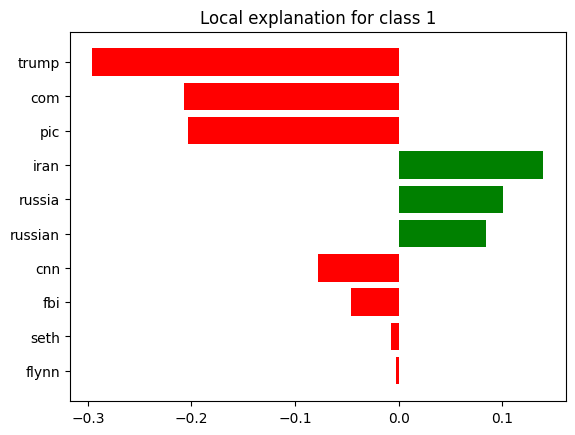

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from lime.lime_tabular import LimeTabularExplainer

# Assuming you already have 'xv_train' and 'y_train' from your dataset
# Ensure that the MultinomialNB model is fitted
mnb = MultinomialNB()

# Fit the model on the training data
mnb.fit(xv_train, y_train)

# Initialize the LimeTabularExplainer with the raw numerical data
explainer = LimeTabularExplainer(
    training_data=xv_train,  # The dense matrix for training data
    feature_names= vector.get_feature_names_out(),  # Actual feature names from the vectorizer
    class_names=[0, 1],  # Replace with your actual class labels (e.g., 'REAL', 'FAKE')
    discretize_continuous=True  # Optional, only if you have continuous features
)

# Select an instance to explain (e.g., the 10th instance from the test set)
instance = xv_test[10]

# Explain the instance using the Multinomial Naive Bayes model's `predict_proba` method
explanation = explainer.explain_instance(instance, mnb.predict_proba, num_features=10)

# Show the explanation in a notebook (if you're working in a Jupyter notebook)
explanation.show_in_notebook()
fig = explanation.as_pyplot_figure()
fig.savefig('lime_explanationmulti.png', dpi=300, bbox_inches='tight')

# Optionally, print the accuracy and classification report
pred_mnb = mnb.predict(xv_test)
print("Accuracy:", accuracy_score(y_test, pred_mnb))
print("Classification Report:")
print(classification_report(y_test, pred_mnb))



SHAP


In [ ]:
feature_names = vector.get_feature_names_out()

<Figure size 1200x800 with 0 Axes>

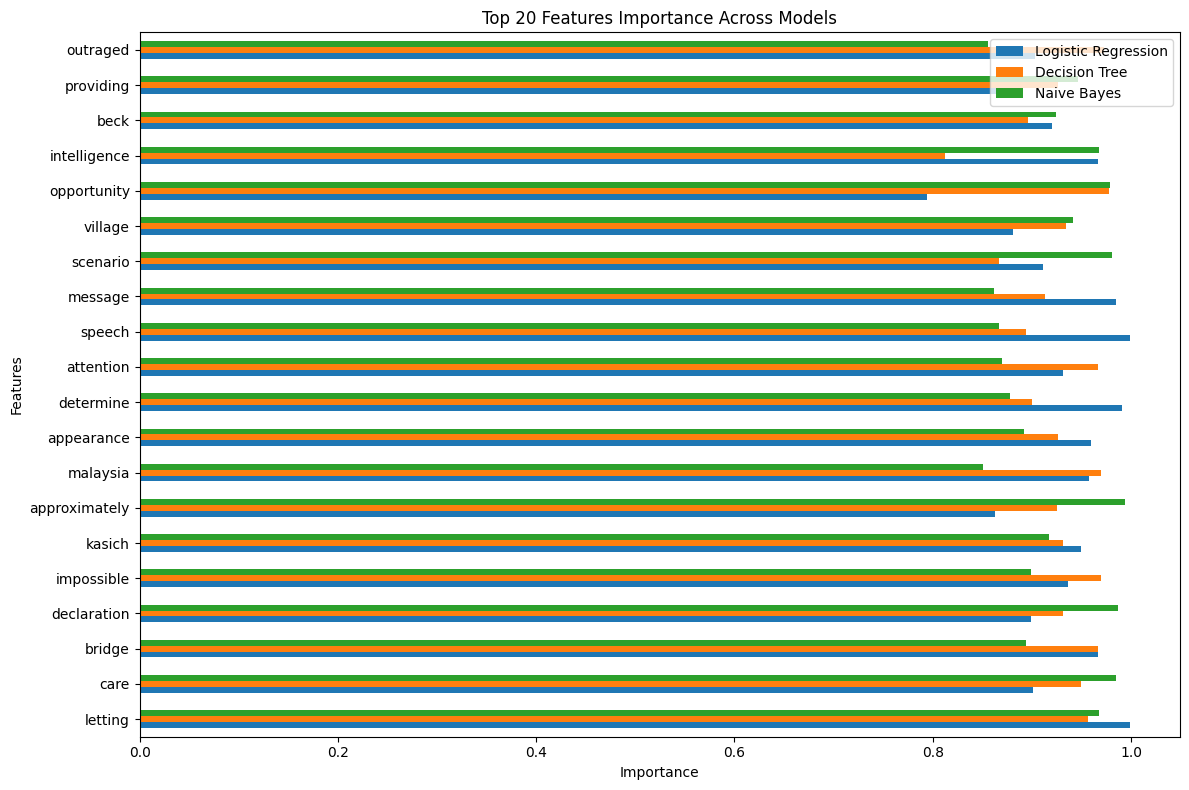

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example Data (Replace with actual feature names and importance values)
feature_names = vector.get_feature_names_out()  # Assuming this gives all feature names
lr_importance = np.random.rand(len(feature_names))  # Logistic Regression importance (dummy values)
dt_importance = np.random.rand(len(feature_names))  # Decision Tree importance (dummy values)
nb_importance = np.random.rand(len(feature_names))  # Naive Bayes importance (dummy values)

# Create DataFrame for Feature Importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Logistic Regression': lr_importance,
    'Decision Tree': dt_importance,
    'Naive Bayes': nb_importance
})

# Calculate Average Importance Across All Models
importance_df['Average Importance'] = importance_df[['Logistic Regression', 'Decision Tree', 'Naive Bayes']].mean(axis=1)

# Sort by Average Importance and Select the Top 20 Features
top_20_features = importance_df.sort_values(by='Average Importance', ascending=False).head(20)
# Plot the Top 20 Features
plt.figure(figsize=(12, 8))
top_20_features.set_index('Feature')[['Logistic Regression', 'Decision Tree', 'Naive Bayes']].plot(kind='barh', figsize=(12, 8))
plt.title('Top 20 Features Importance Across Models')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
# Save the graph image
plt.savefig("top_20_features_importance.png", dpi=300, bbox_inches="tight")
# Show the graph
plt.show()




REAL TIME PREDICTION

In [ ]:
import re
import string
import requests
from bs4 import BeautifulSoup

# Function to preprocess the input text (same as during training)
def wordopt(content):
    content = re.sub('[%s]' % re.escape(string.punctuation), '', content)  # Remove punctuation
    content = re.sub('\n', '', content)  # Remove newlines
    content = re.sub('\w*\d\w*', '', content)  # Remove words with digits
    return content

# Function to fetch the content of an article from a URL
def fetch_text_from_url(url):
    """
    Fetches the content of the article from the given URL.
    Uses requests to fetch the page and BeautifulSoup to parse the text.
    """
    try:
        # Send a request to fetch the URL content
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract the text content of the article (You may need to adjust this part based on the page structure)
        paragraphs = soup.find_all('p')  # Most article content is usually in <p> tags
        article_text = ' '.join([para.get_text() for para in paragraphs])

        return article_text
    except Exception as e:
        return str(e)

# Real-time prediction function using multiple models
def predict_fake_news_from_url(url, vectorizer, models):
    # Fetch the article text from the URL
    article_text = fetch_text_from_url(url)

    if not article_text:
        return "Could not retrieve content from URL."

    # Preprocess the text using the wordopt function
    processed_text = wordopt(article_text)

    # Vectorize the preprocessed text using the same vectorizer
    input_vector = vectorizer.transform([processed_text])

    # Convert sparse matrix to dense format
    input_vector_dense = input_vector.toarray()

    # Collect predictions from all models
    predictions = {}
    for model_name, model in models.items():
        prediction = model.predict(input_vector_dense)
        predictions[model_name] = "Real News" if prediction == 1 else "Fake News"

    # For ensemble model (if available), you can perform majority voting or another strategy here
    ensemble_prediction = majority_vote(predictions)
    predictions["Ensemble Model"] = ensemble_prediction

    return predictions

# Helper function for ensemble prediction (majority vote)
def majority_vote(predictions):
    """
    This function uses majority voting from model predictions to decide the final output.
    If more than half of the models predict 'Real News', it returns 'Real News', otherwise 'Fake News'.
    """
    real_count = sum(1 for pred in predictions.values() if pred == "Real News")
    fake_count = len(predictions) - real_count
    return "Real News" if real_count > fake_count else "Fake News"

# Example usage with your trained models
models = {
     'SVM': clf_linear1,
    'Decision Tree': best_model4,
    'Naive Bayes': best_model3,
    'Gaussian NB': best_model2,
    'Logistic Regression': lr

}

url_input = "https://www.bollywoodshaadis.com/articles/vijay-deverakonda-shares-his-marriage-is-on-cards-with-rashmika-mandanna-58099"
predictions = predict_fake_news_from_url(url_input, vector, models)

# Print predictions for each model and ensemble
for model_name, prediction in predictions.items():
    print(f"The article is classified as: {model_name} -> {prediction}")


The article is classified as: SVM -> Fake News
The article is classified as: Decision Tree -> Fake News
The article is classified as: Naive Bayes -> Fake News
The article is classified as: Gaussian NB -> Fake News
The article is classified as: Logistic Regression -> Fake News
The article is classified as: Ensemble Model -> Fake News


In [ ]:
import re
import string
import requests
from bs4 import BeautifulSoup

# Function to preprocess the input text (same as during training)
def wordopt(content):
    content = re.sub('[%s]' % re.escape(string.punctuation), '', content)  # Remove punctuation
    content = re.sub('\n', '', content)  # Remove newlines
    content = re.sub('\w*\d\w*', '', content)  # Remove words with digits
    return content

# Function to fetch the content of an article from a URL
def fetch_text_from_url(url):
    """
    Fetches the content of the article from the given URL.
    Uses requests to fetch the page and BeautifulSoup to parse the text.
    """
    try:
        # Send a request to fetch the URL content
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract the text content of the article (You may need to adjust this part based on the page structure)
        paragraphs = soup.find_all('p')  # Most article content is usually in <p> tags
        article_text = ' '.join([para.get_text() for para in paragraphs])

        return article_text
    except Exception as e:
        return str(e)

# Real-time prediction function using multiple models
def predict_fake_news_from_url(url, vectorizer, models):
    # Fetch the article text from the URL
    article_text = fetch_text_from_url(url)

    if not article_text:
        return "Could not retrieve content from URL."

    # Preprocess the text using the wordopt function
    processed_text = wordopt(article_text)

    # Vectorize the preprocessed text using the same vectorizer
    input_vector = vectorizer.transform([processed_text])

    # Convert sparse matrix to dense format
    input_vector_dense = input_vector.toarray()

    # Collect predictions from all models
    predictions = {}
    for model_name, model in models.items():
        prediction = model.predict(input_vector_dense)
        predictions[model_name] = "Real News" if prediction == 1 else "Fake News"

    # For ensemble model (if available), you can perform majority voting or another strategy here
    ensemble_prediction = majority_vote(predictions)
    predictions["Ensemble Model"] = ensemble_prediction

    return predictions

# Helper function for ensemble prediction (majority vote)
def majority_vote(predictions):
    """
    This function uses majority voting from model predictions to decide the final output.
    If more than half of the models predict 'Real News', it returns 'Real News', otherwise 'Fake News'.
    """
    real_count = sum(1 for pred in predictions.values() if pred == "Real News")
    fake_count = len(predictions) - real_count
    return "Real News" if real_count > fake_count else "Fake News"

# Example usage with your trained models
models = {
     'SVM': clf_linear1,
    'Decision Tree': best_model4,
    'Naive Bayes': best_model3,
    'Gaussian NB': best_model2,
    'Logistic Regression': best_model
}


url_input = "https://en.wikipedia.org/wiki/Narendra_Modi"
predictions = predict_fake_news_from_url(url_input, vector, models)

# Print predictions for each model and ensemble
for model_name, prediction in predictions.items():
    print(f"The article is classified as: {model_name} -> {prediction}")

The article is classified as: SVM -> Real News
The article is classified as: Decision Tree -> Fake News
The article is classified as: Naive Bayes -> Real News
The article is classified as: Gaussian NB -> Real News
The article is classified as: Logistic Regression -> Real News
The article is classified as: Ensemble Model -> Real News


Since the real time prediction for decision tree is not accurate even after hyperparameter tuning with high accuracy due to overfitting. Therefore lets reduce the overfitting using regularization technique and manual hyperparameter tuning.


In [ ]:
Dt2 = DecisionTreeClassifier(
    max_leaf_nodes=550,
    random_state=42,
    ccp_alpha=0.00001,
    max_features='sqrt',  # 'sqrt' is a string, so it needs quotes
    min_samples_leaf=10,
    min_samples_split=2
)
Dt2.fit(xv_train, y_train)
y_pred_dt2 = Dt2.predict(xv_test)
print(accuracy_score(y_test, y_pred_dt2))

0.9166180077075792


In [ ]:
import re
import string
import requests
from bs4 import BeautifulSoup

# Function to preprocess the input text (same as during training)
def wordopt(content):
    content = re.sub('[%s]' % re.escape(string.punctuation), '', content)  # Remove punctuation
    content = re.sub('\n', '', content)  # Remove newlines
    content = re.sub('\w*\d\w*', '', content)  # Remove words with digits
    return content

# Function to fetch the content of an article from a URL
def fetch_text_from_url(url):
    """
    Fetches the content of the article from the given URL.
    Uses requests to fetch the page and BeautifulSoup to parse the text.
    """
    try:
        # Send a request to fetch the URL content
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract the text content of the article (You may need to adjust this part based on the page structure)
        paragraphs = soup.find_all('p')  # Most article content is usually in <p> tags
        article_text = ' '.join([para.get_text() for para in paragraphs])

        return article_text
    except Exception as e:
        return str(e)

# Real-time prediction function using multiple models
def predict_fake_news_from_url(url, vectorizer, models):
    # Fetch the article text from the URL
    article_text = fetch_text_from_url(url)

    if not article_text:
        return "Could not retrieve content from URL."

    # Preprocess the text using the wordopt function
    processed_text = wordopt(article_text)

    # Vectorize the preprocessed text using the same vectorizer
    input_vector = vectorizer.transform([processed_text])

    # Convert sparse matrix to dense format
    input_vector_dense = input_vector.toarray()

    # Collect predictions from all models
    predictions = {}
    for model_name, model in models.items():
        prediction = model.predict(input_vector_dense)
        predictions[model_name] = "Real News" if prediction == 1 else "Fake News"

    # For ensemble model (if available), you can perform majority voting or another strategy here
    ensemble_prediction = majority_vote(predictions)
    predictions["Ensemble Model"] = ensemble_prediction

    return predictions

# Helper function for ensemble prediction (majority vote)
def majority_vote(predictions):
    """
    This function uses majority voting from model predictions to decide the final output.
    If more than half of the models predict 'Real News', it returns 'Real News', otherwise 'Fake News'.
    """
    real_count = sum(1 for pred in predictions.values() if pred == "Real News")
    fake_count = len(predictions) - real_count
    return "Real News" if real_count > fake_count else "Fake News"

# Example usage with your trained models
models = {
   'SVM': clf_linear1,
    'Decision Tree': Dt2,
    'Naive Bayes': best_model3,
    'Gaussian NB': best_model2,
    'Logistic Regression': lr
}




url_input = "https://en.wikipedia.org/wiki/Narendra_Modi"
predictions = predict_fake_news_from_url(url_input, vector, models)

# Print predictions for each model and ensemble
for model_name, prediction in predictions.items():
    print(f"The article is classified as: {model_name} -> {prediction}")

The article is classified as: SVM -> Real News
The article is classified as: Decision Tree -> Real News
The article is classified as: Naive Bayes -> Real News
The article is classified as: Gaussian NB -> Real News
The article is classified as: Logistic Regression -> Real News
The article is classified as: Ensemble Model -> Real News


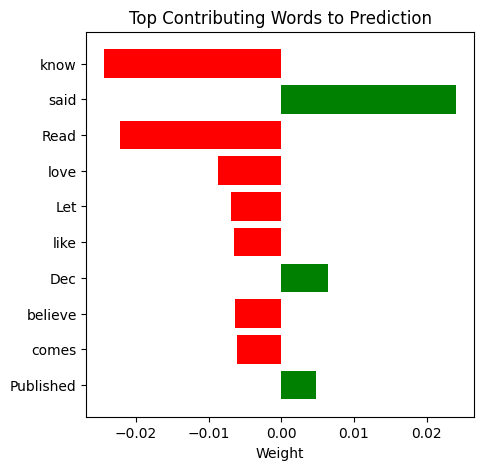

Feature importance graph saved as feature_importancerea2.png
Predictions: {'SVM': 'Fake News', 'Decision Tree': 'Fake News', 'Naive Bayes': 'Fake News', 'Gaussian NB': 'Fake News', 'Logistic Regression': 'Fake News'}
Top contributing words and their weights:
know: -0.0244
said: 0.0241
Read: -0.0223
love: -0.0086
Let: -0.0069
like: -0.0065
Dec: 0.0064
believe: -0.0064
comes: -0.0061
Published: 0.0047


In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from lime.lime_text import LimeTextExplainer
import matplotlib.pyplot as plt

# Function to preprocess the input text (same as during training)
def wordopt(content):
    content = re.sub('[%s]' % re.escape(string.punctuation), '', content)  # Remove punctuation
    content = re.sub('\n', '', content)  # Remove newlines
    content = re.sub('\w*\d\w*', '', content)  # Remove words with digits
    return content

# Function to fetch the content of an article from a URL
def fetch_text_from_url(url):
    """
    Fetches the content of the article from the given URL.
    Uses requests to fetch the page and BeautifulSoup to parse the text.
    """
    try:
        # Send a request to fetch the URL content
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract the text content of the article
        paragraphs = soup.find_all('p')  # Most article content is usually in <p> tags
        article_text = ' '.join([para.get_text() for para in paragraphs])

        return article_text
    except Exception as e:
        return str(e)

# Function to predict and explain the classification
def predict_fake_news_from_url(url, vectorizer, models):
    # Fetch the article text from the URL
    article_text = fetch_text_from_url(url)

    if not article_text:
        return "Could not retrieve content from URL."

    # Preprocess the text using the wordopt function
    processed_text = wordopt(article_text)

    # Vectorize the preprocessed text using the same vectorizer
    input_vector = vectorizer.transform([processed_text])

    # Convert the sparse matrix to dense format
    input_vector_dense = input_vector.toarray()

    # Initialize a dictionary to store predictions from all models
    model_predictions = {}

    # Iterate through each model and get predictions
    for model_name, model in models.items():
        prediction = model.predict(input_vector_dense)  # Use dense format here
        prediction_text = "Real News" if prediction == 1 else "Fake News"
        model_predictions[model_name] = prediction_text

    # Explain the prediction for one of the models (using LIME)
    explanation = explain_prediction_lime(vectorizer, models['Logistic Regression'], processed_text)

    # Plot the importance graph
    plot_feature_importance(explanation)

    return model_predictions, explanation

# Function to explain the prediction using LIME
def explain_prediction_lime(vectorizer, model, input_text):
    # Initialize the LIME text explainer
    explainer = LimeTextExplainer(class_names=['Fake News', 'Real News'])

    # Define a function for prediction that LIME will use
    def predict_proba(texts):
        # Vectorize the text and get the model's prediction probabilities
        vec_texts = vectorizer.transform(texts)
        return model.predict_proba(vec_texts)

    # Use LIME to explain the model's prediction for the input text
    explanation = explainer.explain_instance(input_text, predict_proba, num_features=10)

    # Get the most important words/features from the explanation
    explanation_data = explanation.as_list()

    return explanation_data

def plot_feature_importance(explanation, file_name="feature_importancerea2.png"):
    words, weights = zip(*explanation)  # Unzip explanation data into words and weights

    # Color bars based on weight values: green for positive, red for negative
    colors = ['green' if weight > 0 else 'red' for weight in weights]

    # Plot the top contributing words
    plt.figure(figsize=(5, 5))
    plt.barh(words, weights, color=colors)
    plt.xlabel('Weight')
    plt.title('Top Contributing Words to Prediction')
    plt.gca().invert_yaxis()
    plt.show() # Invert y-axis to show the highest weights on top

    # Save the plot as an image
    plt.savefig(file_name, format='png')
    plt.close()  # Close the plot to avoid it from displaying

    print(f"Feature importance graph saved as {file_name}")


# Test the model with a URL
url_input = "https://www.bollywoodshaadis.com/articles/vijay-deverakonda-shares-his-marriage-is-on-cards-with-rashmika-mandanna-58099"  # Replace with a real URL


models = {
    'SVM': clf_linear1,
    'Decision Tree': Dt2,
    'Naive Bayes': best_model3,
    'Gaussian NB': best_model2,
    'Logistic Regression': lr
}


prediction, explanation = predict_fake_news_from_url(url_input, vector, models)
print(f"Predictions: {prediction}")
print("Top contributing words and their weights:")
for word, weight in explanation:
    print(f"{word}: {weight:.4f}")


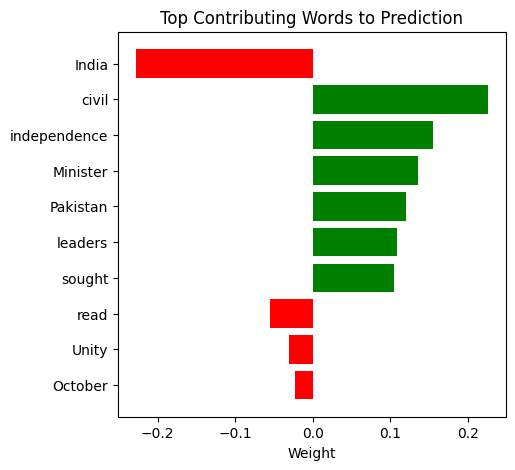

Feature importance graph saved as feature_importancereal.png
Predictions: {'SVM': 'Real News', 'Decision Tree': 'Real News', 'Naive Bayes': 'Real News', 'Gaussian NB': 'Real News', 'Logistic Regression': 'Real News'}
Top contributing words and their weights:
India: -0.2282
civil: 0.2261
independence: 0.1554
Minister: 0.1358
Pakistan: 0.1206
leaders: 0.1087
sought: 0.1046
read: -0.0545
Unity: -0.0310
October: -0.0225


In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from lime.lime_text import LimeTextExplainer
import matplotlib.pyplot as plt

# Function to preprocess the input text (same as during training)
def wordopt(content):
    content = re.sub('[%s]' % re.escape(string.punctuation), '', content)  # Remove punctuation
    content = re.sub('\n', '', content)  # Remove newlines
    content = re.sub('\w*\d\w*', '', content)  # Remove words with digits
    return content

# Function to fetch the content of an article from a URL
def fetch_text_from_url(url):
    """
    Fetches the content of the article from the given URL.
    Uses requests to fetch the page and BeautifulSoup to parse the text.
    """
    try:
        # Send a request to fetch the URL content
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract the text content of the article
        paragraphs = soup.find_all('p')  # Most article content is usually in <p> tags
        article_text = ' '.join([para.get_text() for para in paragraphs])

        return article_text
    except Exception as e:
        return str(e)

# Function to predict and explain the classification
def predict_fake_news_from_url(url, vectorizer, models):
    # Fetch the article text from the URL
    article_text = fetch_text_from_url(url)

    if not article_text:
        return "Could not retrieve content from URL."

    # Preprocess the text using the wordopt function
    processed_text = wordopt(article_text)

    # Vectorize the preprocessed text using the same vectorizer
    input_vector = vectorizer.transform([processed_text])

    # Convert the sparse matrix to dense format
    input_vector_dense = input_vector.toarray()

    # Initialize a dictionary to store predictions from all models
    model_predictions = {}

    # Iterate through each model and get predictions
    for model_name, model in models.items():
        prediction = model.predict(input_vector_dense)  # Use dense format here
        prediction_text = "Real News" if prediction == 1 else "Fake News"
        model_predictions[model_name] = prediction_text

    # Explain the prediction for one of the models (using LIME)
    explanation = explain_prediction_lime(vectorizer, models['Logistic Regression'], processed_text)

    # Plot the importance graph
    plot_feature_importance(explanation)

    return model_predictions, explanation

# Function to explain the prediction using LIME
def explain_prediction_lime(vectorizer, model, input_text):
    # Initialize the LIME text explainer
    explainer = LimeTextExplainer(class_names=['Fake News', 'Real News'])

    # Define a function for prediction that LIME will use
    def predict_proba(texts):
        # Vectorize the text and get the model's prediction probabilities
        vec_texts = vectorizer.transform(texts)
        return model.predict_proba(vec_texts)

    # Use LIME to explain the model's prediction for the input text
    explanation = explainer.explain_instance(input_text, predict_proba, num_features=10)

    # Get the most important words/features from the explanation
    explanation_data = explanation.as_list()

    return explanation_data

# Function to plot the feature importance graph with color customization
# Function to plot the feature importance graph with color customization and save it
def plot_feature_importance(explanation, file_name="feature_importancereal.png"):
    words, weights = zip(*explanation)  # Unzip explanation data into words and weights

    # Color bars based on weight values: green for positive, red for negative
    colors = ['green' if weight > 0 else 'red' for weight in weights]

    # Plot the top contributing words
    plt.figure(figsize=(5, 5))
    plt.barh(words, weights, color=colors)
    plt.xlabel('Weight')
    plt.title('Top Contributing Words to Prediction')
    plt.gca().invert_yaxis()
    plt.show() # Invert y-axis to show the highest weights on top

    # Save the plot as an image
    plt.savefig(file_name, format='png')
    plt.close()  # Close the plot to avoid it from displaying

    print(f"Feature importance graph saved as {file_name}")


# Test the model with a URL
url_input = "https://en.wikipedia.org/wiki/Vallabhbhai_Patel"


models = {
    'SVM': clf_linear1,
    'Decision Tree': Dt2,
    'Naive Bayes': best_model3,
    'Gaussian NB': best_model2,
    'Logistic Regression': best_model
}


prediction, explanation = predict_fake_news_from_url(url_input, vector, models)
print(f"Predictions: {prediction}")
print("Top contributing words and their weights:")
for word, weight in explanation:
    print(f"{word}: {weight:.4f}")